<a href="https://colab.research.google.com/github/mssabahi/Data_Preparation/blob/main/ch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install wget
# import wget
# wget.download('https://drive.google.com/file/d/1ABqgDm2pWJLOyNHZtrZGA3EStWupkhym/view?usp=sharing/diabetes.csv', 'diabetes.csv')


If the data used to train a model is only slightly different than test or future data, it won't matter and you can go ahead with model tuning.

In [ ]:
# Import modules
import numpy as np
import pandas as pd

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/ML_Interview/Chapter_01/LoansTrainingSetReduced.csv')

In [ ]:
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


### Machine Learning PipeLine


![](https://drive.google.com/uc?id=1dE6zMXHKkPxxU01o1SxWhONW0uRXEbMY)



### The hunt for missing values

Questions about processing missing values are integral to any machine learning interview. If you are provided with a dataset with missing values, not addressing them will likely skew your results and lower your model's accuracy.

In this exercise, you'll practice the first pre-processing step by finding and exploring ways to handle missing values using pandas and numpy on a customer loan dataset.

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   88910 non-null  object 
 1   Current Loan Amount           88910 non-null  int64  
 2   Term                          88910 non-null  object 
 3   Credit Score                  67572 non-null  float64
 4   Years in current job          88910 non-null  float64
 5   Home Ownership                88910 non-null  object 
 6   Annual Income                 67572 non-null  float64
 7   Purpose                       88910 non-null  object 
 8   Monthly Debt                  88910 non-null  float64
 9   Years of Credit History       88910 non-null  float64
 10  Months since last delinquent  40404 non-null  float64
 11  Number of Open Accounts       88910 non-null  int64  
 12  Number of Credit Problems     88910 non-null  int64  
 13  C

In [ ]:
# Print missing values
print(loan_data.isna().sum())

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64


### Simple imputation
As you saw in the last exercise, deleting data can reduce your dataset by too much. In an interview context, this can lead to biased results of your machine learning model.

A more dynamic way of handling missing values is by imputing them. There are a variety of ways of doing this in python, but in this exercise you will be using the SimpleImputer() function from the sklearn.impute module on loan_data.

You will then use pandas and numpy to convert the imputed dataset into a DataFrame.

### **No1: Usueful Functions**:
```
Function returns df.isna().sum()              number missing

df['feature'].mean()                          feature mean

.shape                                        row, column dimensions
 
df.columns                                    column names

.fillna(0)                                    fills missing with 0
 
select_dtypes(include = [np.number] )         numeric columns

select_dtypes(include = ['object'] )          string columns

.fit_transform(numeric_cols)                  fits and transforma

```



In [ ]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])
numeric_cols.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232,728.0,1.0,46643.0,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,25014,733.0,10.0,81099.0,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,16117,724.0,9.0,60438.0,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,11716,740.0,3.0,34171.0,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,9789,686.0,10.0,47003.0,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [ ]:
# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

### Iterative imputation
In the previous exercise, you derived mean imputations for missing values of loan_data. However, in a machine learning interview, you will probably be asked about more dynamic imputation techniques that rely on other features in the dataset.

In this exercise, you'll practice a machine-learning based approach by imputing missing values as a function of remaining features using IterativeImputer() from sklearn.impute. This is a multivariate imputer that estimates each feature from all of the others in a 'round-robin' fashion.

Note that this function is considered experimental, so please read the documentation for more information.

In [ ]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

### Box-Cox Transformations



```
scipy.stats.boxcox(data, lmbda= )
```



![](https://drive.google.com/uc?id=1jnvijRrYW9LN0jL7KJC52VzcGWNtgaGD)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Subset loan_data to only the Credit Score and Annual Income features, and the target variable Loan Status in that order.
# Create an 80/20 split of loan_data and assign it to loan_data_subset.
# Create pairplots of trainingSet and testSet (in that order) setting the hue argument to the target variable Loan Status.

# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet =  train_test_split(loan_data_subset, test_size=0.20, random_state=123)

In [ ]:
trainingSet.head()

,Credit Score,Annual Income,Loan Status
83911,745.0,64819.0,Fully Paid
43175,693.0,20507.0,Charged Off
61494,736.0,85400.0,Charged Off
18079,NaN,NaN,Fully Paid
443,725.0,33667.0,Charged Off


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

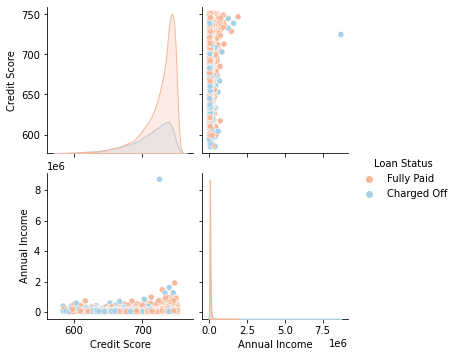

In [ ]:
# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

<Figure size 432x288 with 0 Axes>

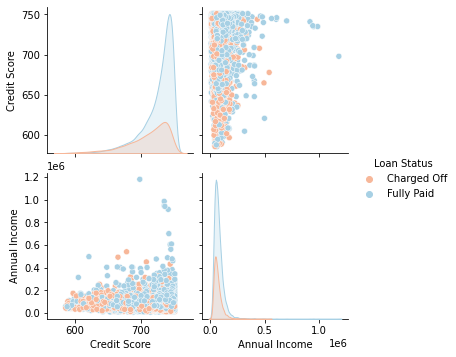

In [ ]:
plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

### Log and power transformations
In the last exercise, you compared the distributions of a training set and test set of loan_data. This is especially poignant in a machine learning interview because the distribution observed dictates whether or not you need to use techniques which nudge your feature distributions toward a normal distribution so that normality assumptions are not violated.

In this exercise, you will be using the log and power transformation from the scipy.stats module on the Years of Credit History feature of loan_data along with the distplot() function from seaborn, which plots both its distribution and kernel density estimation.

All relevant packages have been imported for you.



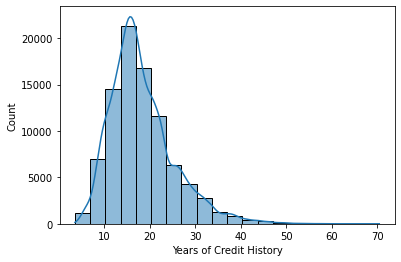

In [ ]:
# Subset loan_data for 'Years of Credit History' and plot its distribution and kernel density estimation (kde) using distplot().

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.histplot(cr_yrs, kde=True, bins=20)
plt.show()

In [ ]:
from scipy import stats

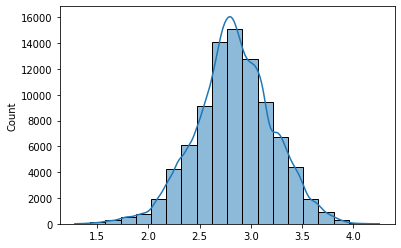

In [ ]:
# Apply a log transformation using the Box-Cox transformation to cr_yrs and plot its distribution and kde.

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = stats.boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.histplot(cr_yrs_log, kde=True, bins=20)
plt.show()


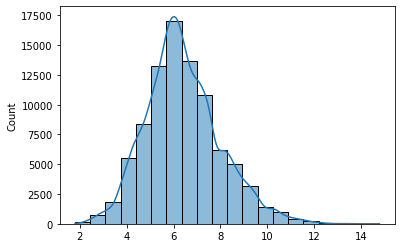

In [ ]:
# Transform 'Years of Credit History' using the Box-Cox square-root argument and plot its distribution and kde.

# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = stats.boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.histplot(cr_yrs_sqrt, bins=20, kde=True)
plt.show()

### Preprocesing Steps:

![](https://drive.google.com/uc?id=1Rhk7CWhonEwkl9uNTVJanbPJrHQTv4nP)

### Outlier detection
A very important aspect of preprocessing your data correctly is outlier detection. In machine learning interview questions, a common question is how to locate and process outliers. An easy way to detect outliers is by visualizing them graphically.

After finding and imputing missing data, finding and figuring out what to do about outliers is another necessary preprocessing step.

There's a variety of packages that let you visualize outliers, but in this exercise, you will be using seaborn to plot univariate and multivariate boxplots of selected columns of loan_data.

All relevant packages have been imported for you.

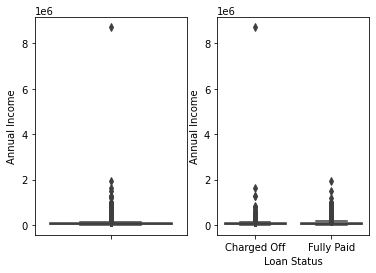

In [ ]:
# Create a univariate boxplot using the feature Annual Income from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Annual Income from loan_data.

# Univariate and multivariate boxplots
fig, ax = plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

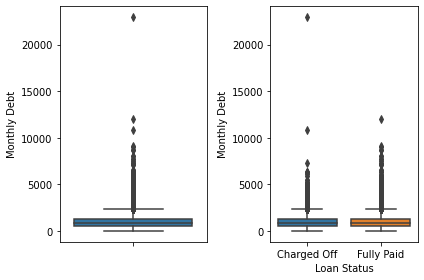

In [ ]:
# Create a univariate boxplot using the feature Monthly Debt from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Monthly Debt from loan_data.

# Multivariate boxplot
fig, ax = plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
fig.tight_layout()
plt.show()

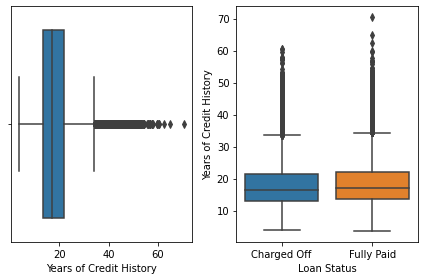

In [ ]:
# Create a univariate boxplot using the feature Years of Credit History from loan_data.
# Create a multivariate boxplot conditioned on Loan Status using the feature Years of Credit History from loan_data.

# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
fig.tight_layout()
plt.show()

### Handling outliers
In the last exercise, you learned how visualizing outliers could come in handy in a machine learning interview. Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.

In this exercise, you will use the scipy.stats module to calculate the Z-score using the stats.zscore() function and the mstats.winsorize() function to replace outliers using a technique called Winsorizing.

Recall from the video lesson that those points above and/or below 1.5 times the IQR should be suspected as possible outliers. For the last step in this exercise, that value is 2120.

The relevant packages have been imported for you, and loan_data's numeric and categorical columns have been subset and saved as numeric_cols and categoric_cols, respectively.

In [ ]:
# Print: before dropping
print('\n Mean of Features\n')
print(numeric_cols.mean())
print('\n Median of Features\n')
print(numeric_cols.median())
print('\n Max of Features\n')
print(numeric_cols.max())


 Mean of Features

Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64

 Median of Features

Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Probl

In [ ]:
categoric_cols = loan_data.select_dtypes(include = ['object'])
categoric_cols

,Loan Status,Term,Home Ownership,Purpose
0,Charged Off,Short Term,Rent,DebtConsolidation
1,Charged Off,Long Term,Mortgage,DebtConsolidation
2,Charged Off,Short Term,Mortgage,HomeImprovements
3,Charged Off,Short Term,Rent,DebtConsolidation
4,Charged Off,Long Term,Mortgage,HomeImprovements
...,...,...,...,...
88905,Fully Paid,Short Term,Rent,DebtConsolidation
88906,Fully Paid,Short Term,Mortgage,DebtConsolidation
88907,Fully Paid,Short Term,Mortgage,DebtConsolidation
88908,Charged Off,Short Term,Rent,DebtConsolidation


In [ ]:
numeric_cols_02.iloc[13,:]

Current Loan Amount              34276.00
Credit Score                       628.00
Years in current job                10.00
Annual Income                   141019.00
Monthly Debt                      2632.36
Years of Credit History             19.90
Months since last delinquent        14.00
Number of Open Accounts             19.00
Number of Credit Problems            0.00
Current Credit Balance           20223.00
Maximum Open Credit              31747.00
Bankruptcies                         0.00
Tax Liens                            0.00
Name: 13, dtype: float64

In [ ]:
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

numeric_cols.loc[idx]

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [ ]:
# Create an index of rows to keep for absolute z-scores less than 3 on the numeric columns and use it to index and concatenate subsets.
# Create index of rows to keep

numeric_cols_02 = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns.to_list())

idx = (np.abs(stats.zscore(numeric_cols_02)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = numeric_cols_02.loc[idx]
# ld_out_drop = pd.concat([numeric_cols_02.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print('\n Mean of Features\n')
print(ld_out_drop.mean())
print('\n Median of Features\n')
print(ld_out_drop.median())
print('\n Max of Features\n')
print(ld_out_drop.max())


 Mean of Features

Current Loan Amount             1.425369e+07
Credit Score                    7.229980e+02
Years in current job            5.705872e+00
Annual Income                   6.810742e+04
Monthly Debt                    9.084579e+02
Years of Credit History         1.786116e+01
Months since last delinquent    3.556495e+01
Number of Open Accounts         1.081810e+01
Number of Credit Problems       1.114713e-01
Current Credit Balance          1.378140e+04
Maximum Open Credit             2.752115e+04
Bankruptcies                    1.001156e-01
Tax Liens                       8.412974e-06
dtype: float64

 Median of Features

Current Loan Amount             13951.000000
Credit Score                      729.000000
Years in current job                6.000000
Annual Income                   61411.421591
Monthly Debt                      822.490000
Years of Credit History            16.800000
Months since last delinquent       34.386687
Number of Open Accounts            10.00000

In [ ]:
np.where(idx==False)[0]

array([   13,    32,    46, ..., 88880, 88900, 88909])



### **No2: Useful Functions**:

```
sns.boxplot(x= , y='Loan Status')       boxplot conditioned on target variable
sns.distplot()                          histogram and kernel density estimate (kde)
np.abs() returns absolute value
stats.zscore()                          calculated z-score
mstats.winsorize(limits=[0.05, 0.05])   floor and ceiling applied to outliers
np.where(condition, true, false)        replaced values


```





 

**Winsorization** is a way to minimize the influence of outliers in your data by either:

* Assigning the outlier a lower weight,
* Changing the value so that it is close to other values in the set.

In [ ]:
# Winsorize 'Monthly Debt' with 5% upper and lower limits and print the mean, median and max before and after.

# Print: before winsorize

from scipy.stats import mstats 

# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

963.1020592734293
843.925
22939.12
Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


In [ ]:
# Find the median of the values of Monthly Debt that are lower than 2120 and replace outliers with it.


# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

### Z-score standardization
In the last exercise, you calculated the Z-score to address outliers. In a machine learning interview, another question might be where else Z-scores are used. They are often used for scaling your data prior to creating a model.

In this exercise you'll use a function from sklearn.preprocessing that was introduced in the video lesson to standardize the numeric feature columns in the loan_data dataset. Recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

The sklearn.preprocessing module has already been imported for you.

In [ ]:
# Create a subset of the numeric and categorical columns in loan_data.

# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)


# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

   Current Loan Amount  Credit Score  ...  Home Ownership            Purpose
0            -0.408982      0.233271  ...            Rent  DebtConsolidation
1            -0.408617      0.415570  ...        Mortgage  DebtConsolidation
2            -0.408871      0.087432  ...        Mortgage   HomeImprovements
3            -0.408997      0.670788  ...            Rent  DebtConsolidation
4            -0.409052     -1.298038  ...        Mortgage   HomeImprovements

[5 rows x 17 columns]
